# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import train as train

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.* 
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

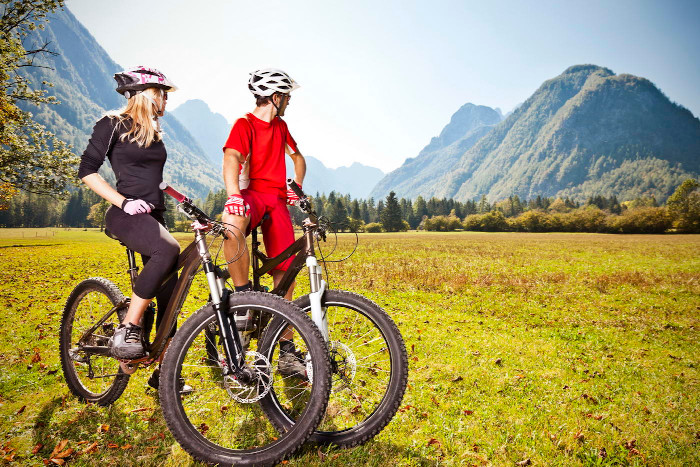

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
  * `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [5]:
data_day  = pd.read_csv('day.csv')
train_data_day, test_data_day = train_test_split(data_day, test_size=0.2)
train_data_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
498      499  2012-05-13       2   1     5        0        0           0   
714      715  2012-12-15       4   1    12        0        6           0   
291      292  2011-10-19       4   0    10        0        3           1   
8          9  2011-01-09       1   0     1        0        0           0   
561      562  2012-07-15       3   1     7        0        0           0   
..       ...         ...     ...  ..   ...      ...      ...         ...   
283      284  2011-10-11       4   0    10        0        2           1   
583      584  2012-08-06       3   1     8        0        1           1   
107      108  2011-04-18       2   0     4        0        1           1   
370      371  2012-01-06       1   1     1        0        5           1   
645      646  2012-10-07       4   1    10        0        0           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
498           1  0.612500  0.585238  0.576250   0.225117    2172        3946   
714           1  0.324167  0.338383  0.650417   0.106350     767        4280   
291           3  0.541739  0.513848  0.895217   0.243339     254        2170   
8             1  0.138333  0.116175  0.434167   0.361950      54         768   
561           1  0.745833  0.705196  0.717917   0.166667    1920        4111   
..          ...       ...       ...       ...        ...     ...         ...   
283           2  0.566667  0.546096  0.808750   0.143042     667        3896   
583           2  0.752500  0.710246  0.654167   0.129354    1233        5780   
107           1  0.512500  0.503146  0.542500   0.163567     669        2760   
370           1  0.334167  0.340267  0.542083   0.167908     307        3791   
645           2  0.415833  0.419813  0.708333   0.141162     781        2729   

      cnt  
498  6118  
714  5047  
291  2424  
8     822  
561  6031  
..    ...  
283  4563  
583  7013  
107  3429  
370  4098  
645  3510  

[584 rows x 16 columns]

C:\Users\Gregory\AppData\Local\Temp\ipykernel_18768\351700123.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mnth', y='cnt', data=train_data_day, palette='Set3')
C:\Users\Gregory\AppData\Local\Temp\ipykernel_18768\351700123.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=train_data_day, palette='Set3')


Text(0.5, 1.0, 'Зависимость количества от погоды')

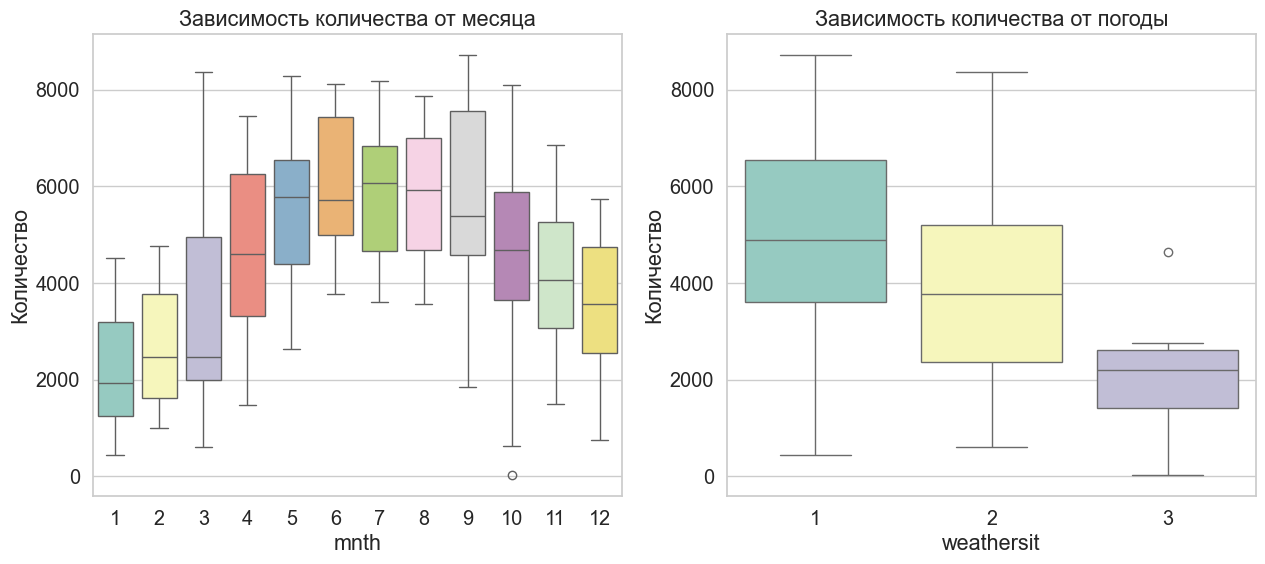

In [63]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x='mnth', y='cnt', data=train_data_day, palette='Set3')
plt.ylabel('Количество')
plt.title('Зависимость количества от месяца')

plt.subplot(122)
sns.boxplot(x='weathersit', y='cnt', data=train_data_day, palette='Set3')
plt.ylabel('Количество')

plt.title('Зависимость количества от погоды')

In [7]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

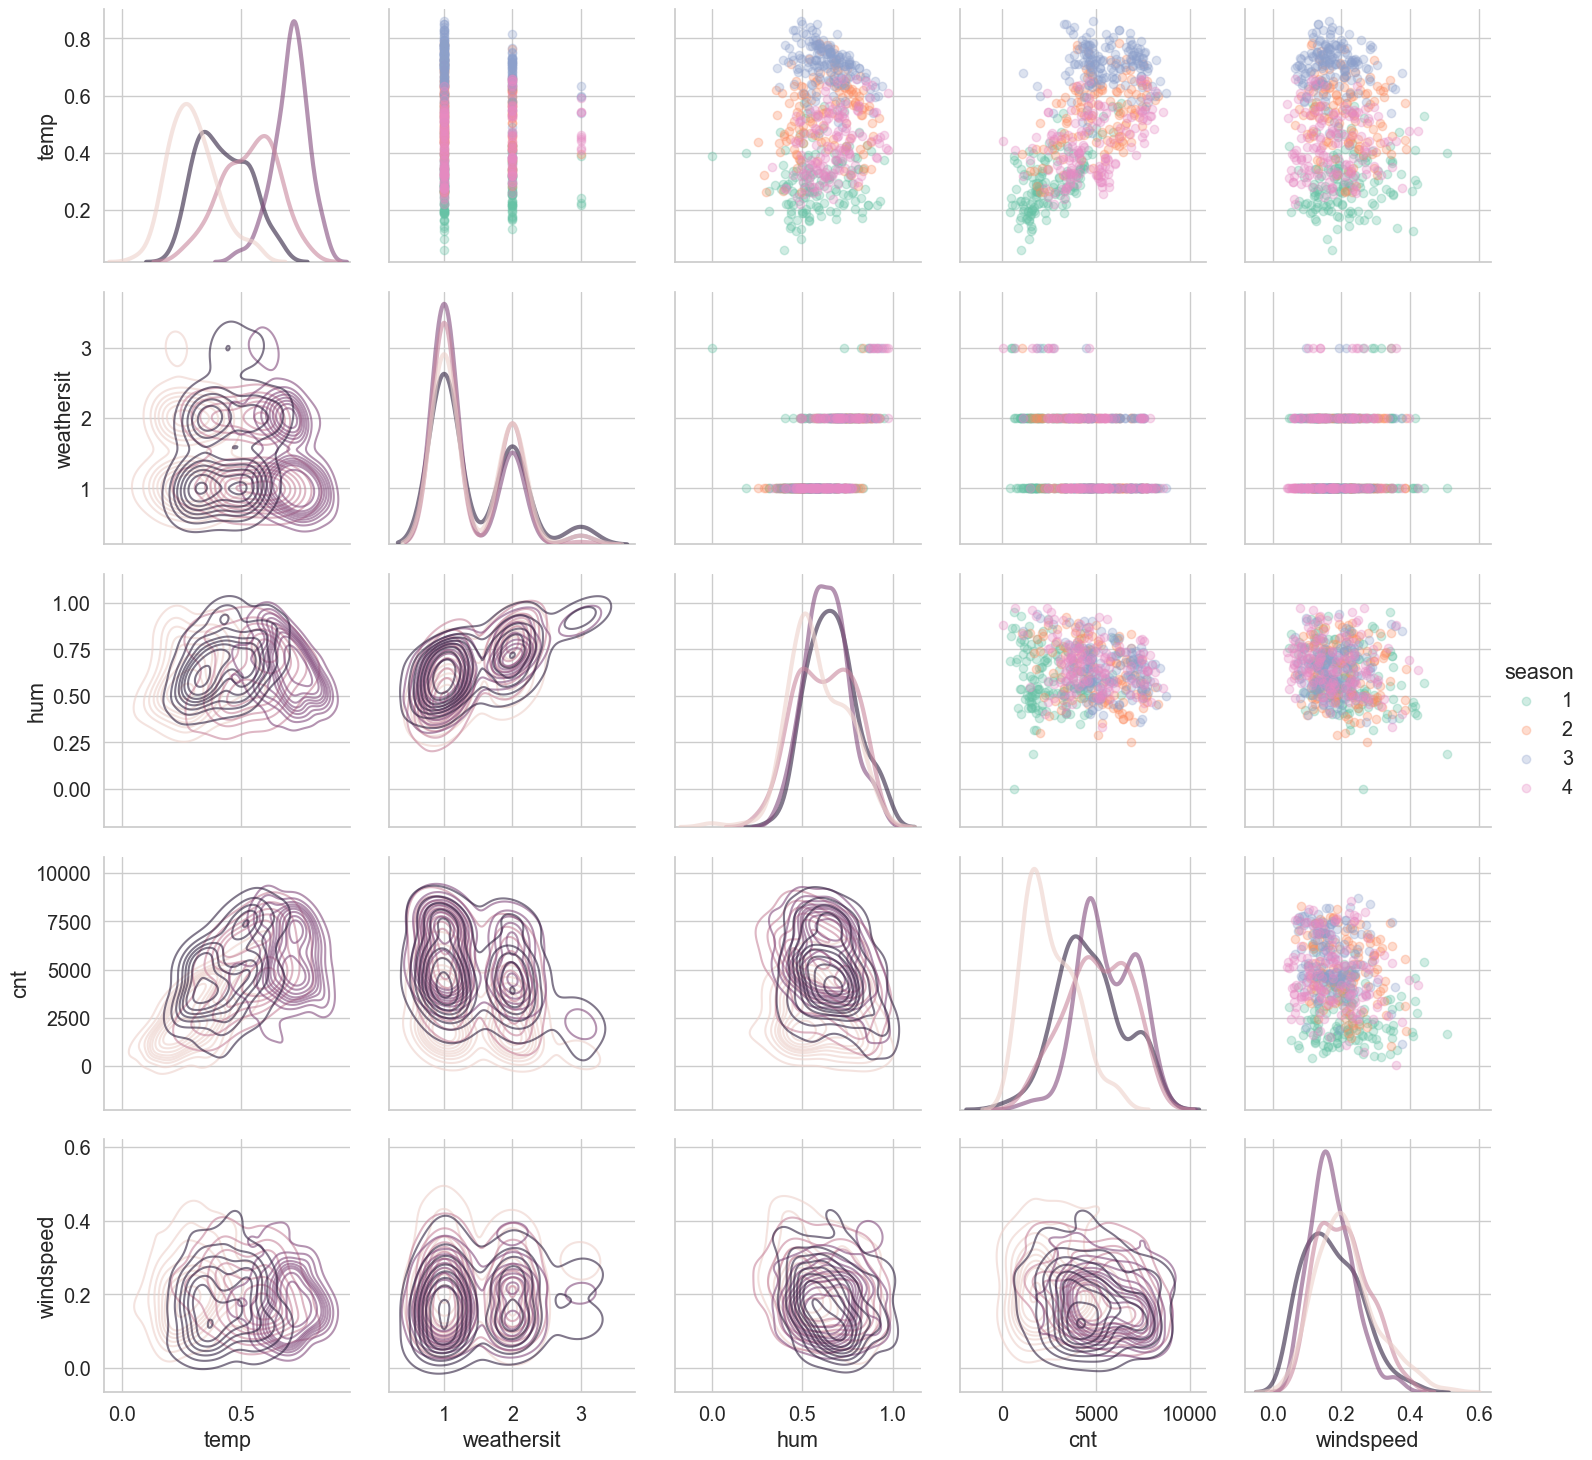

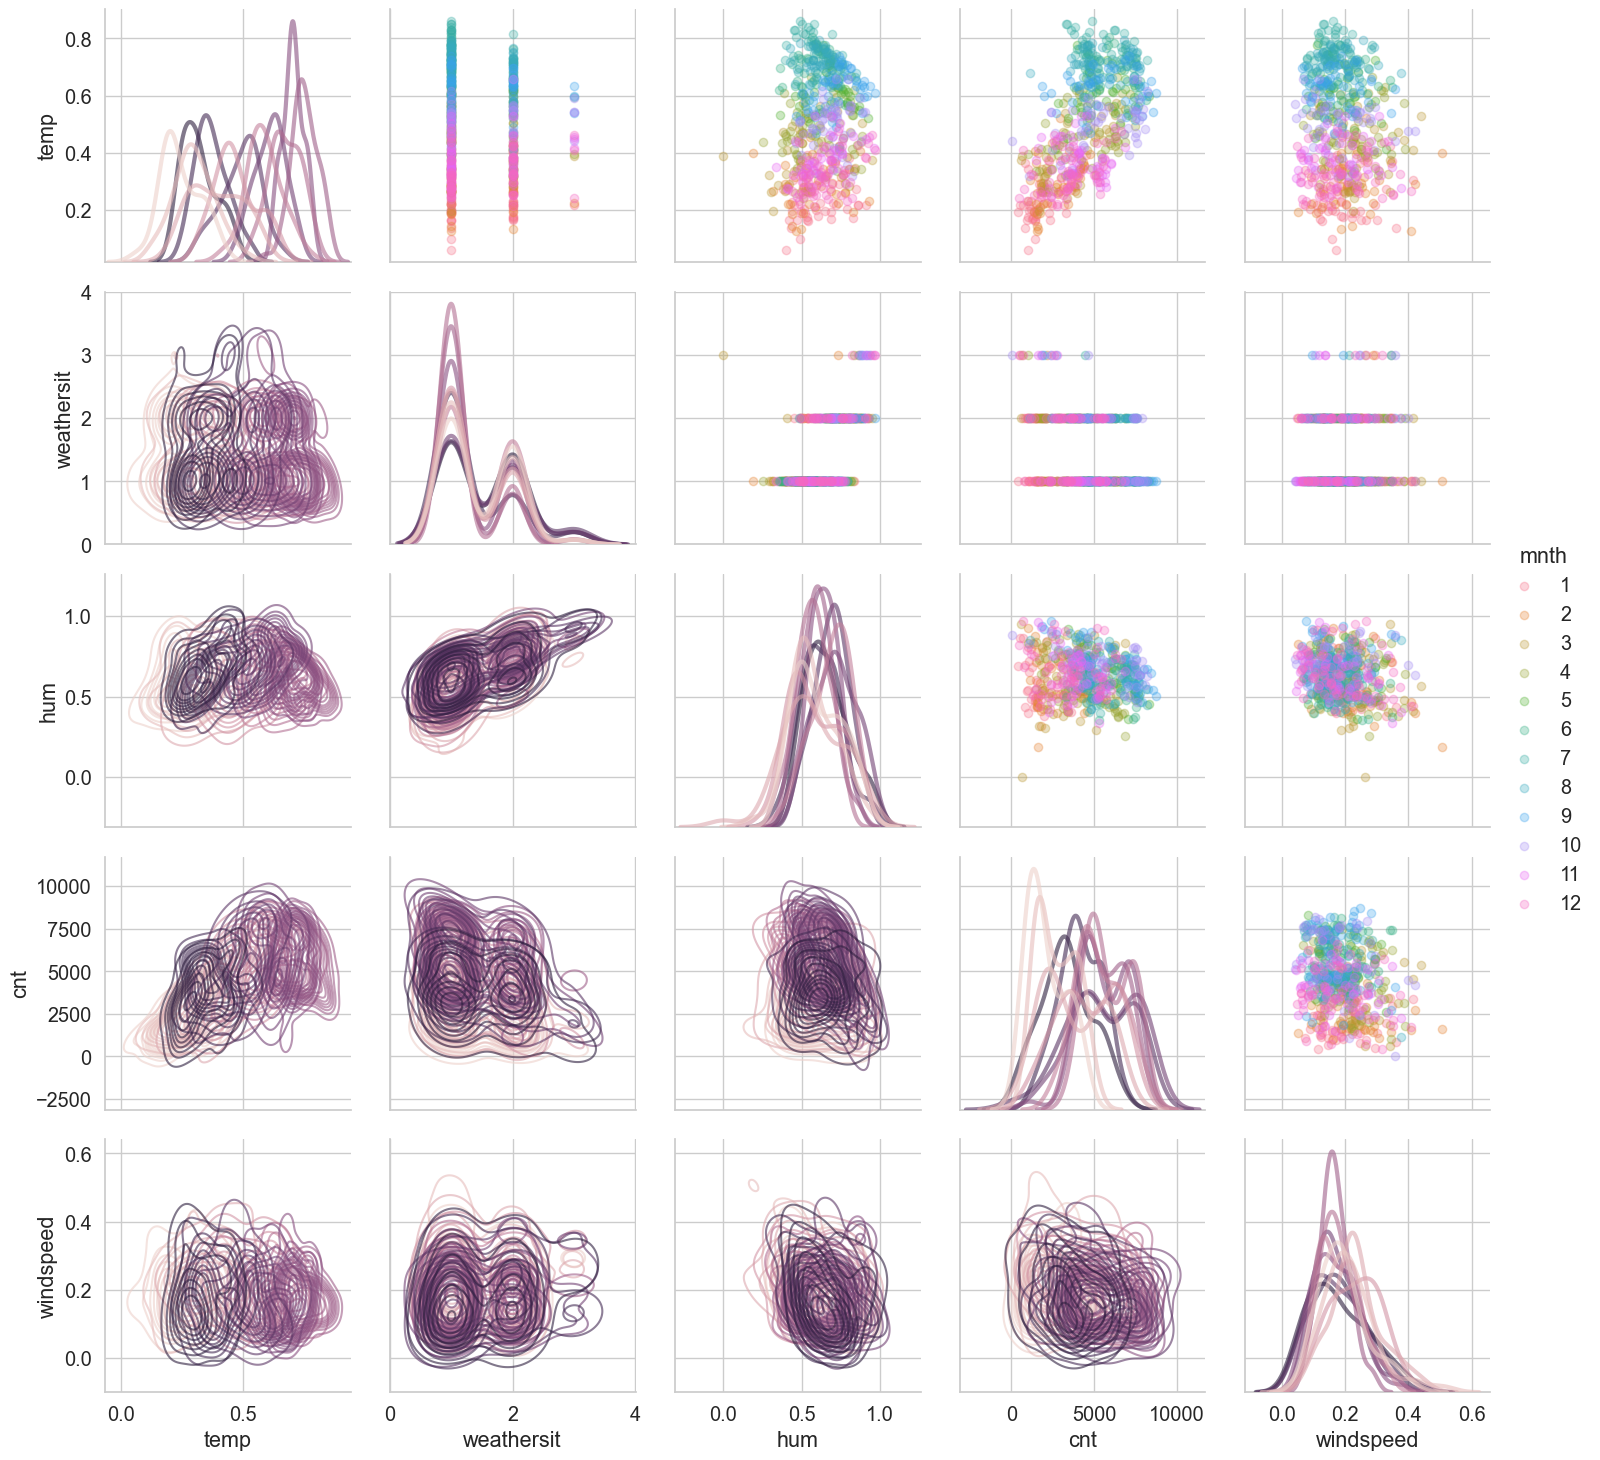

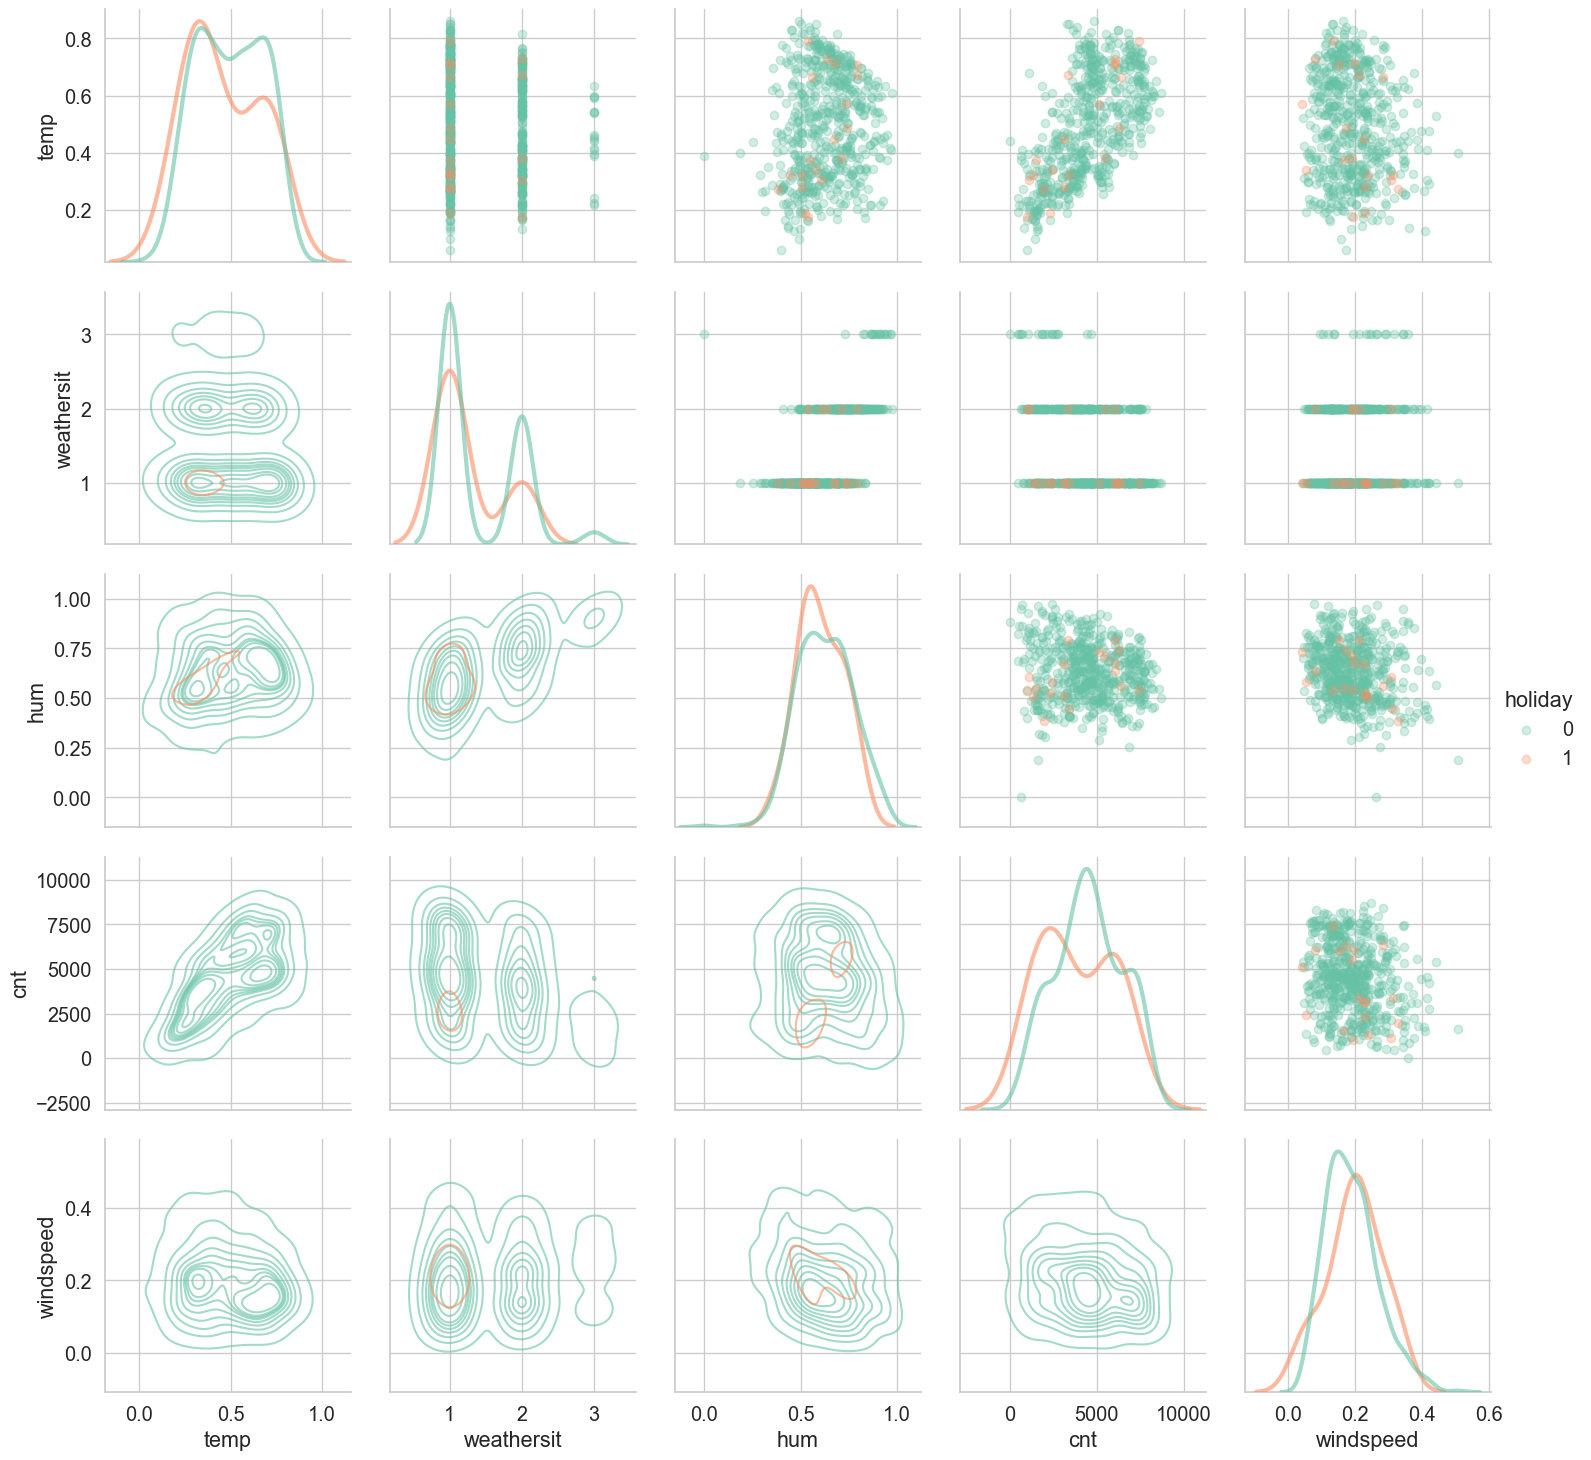

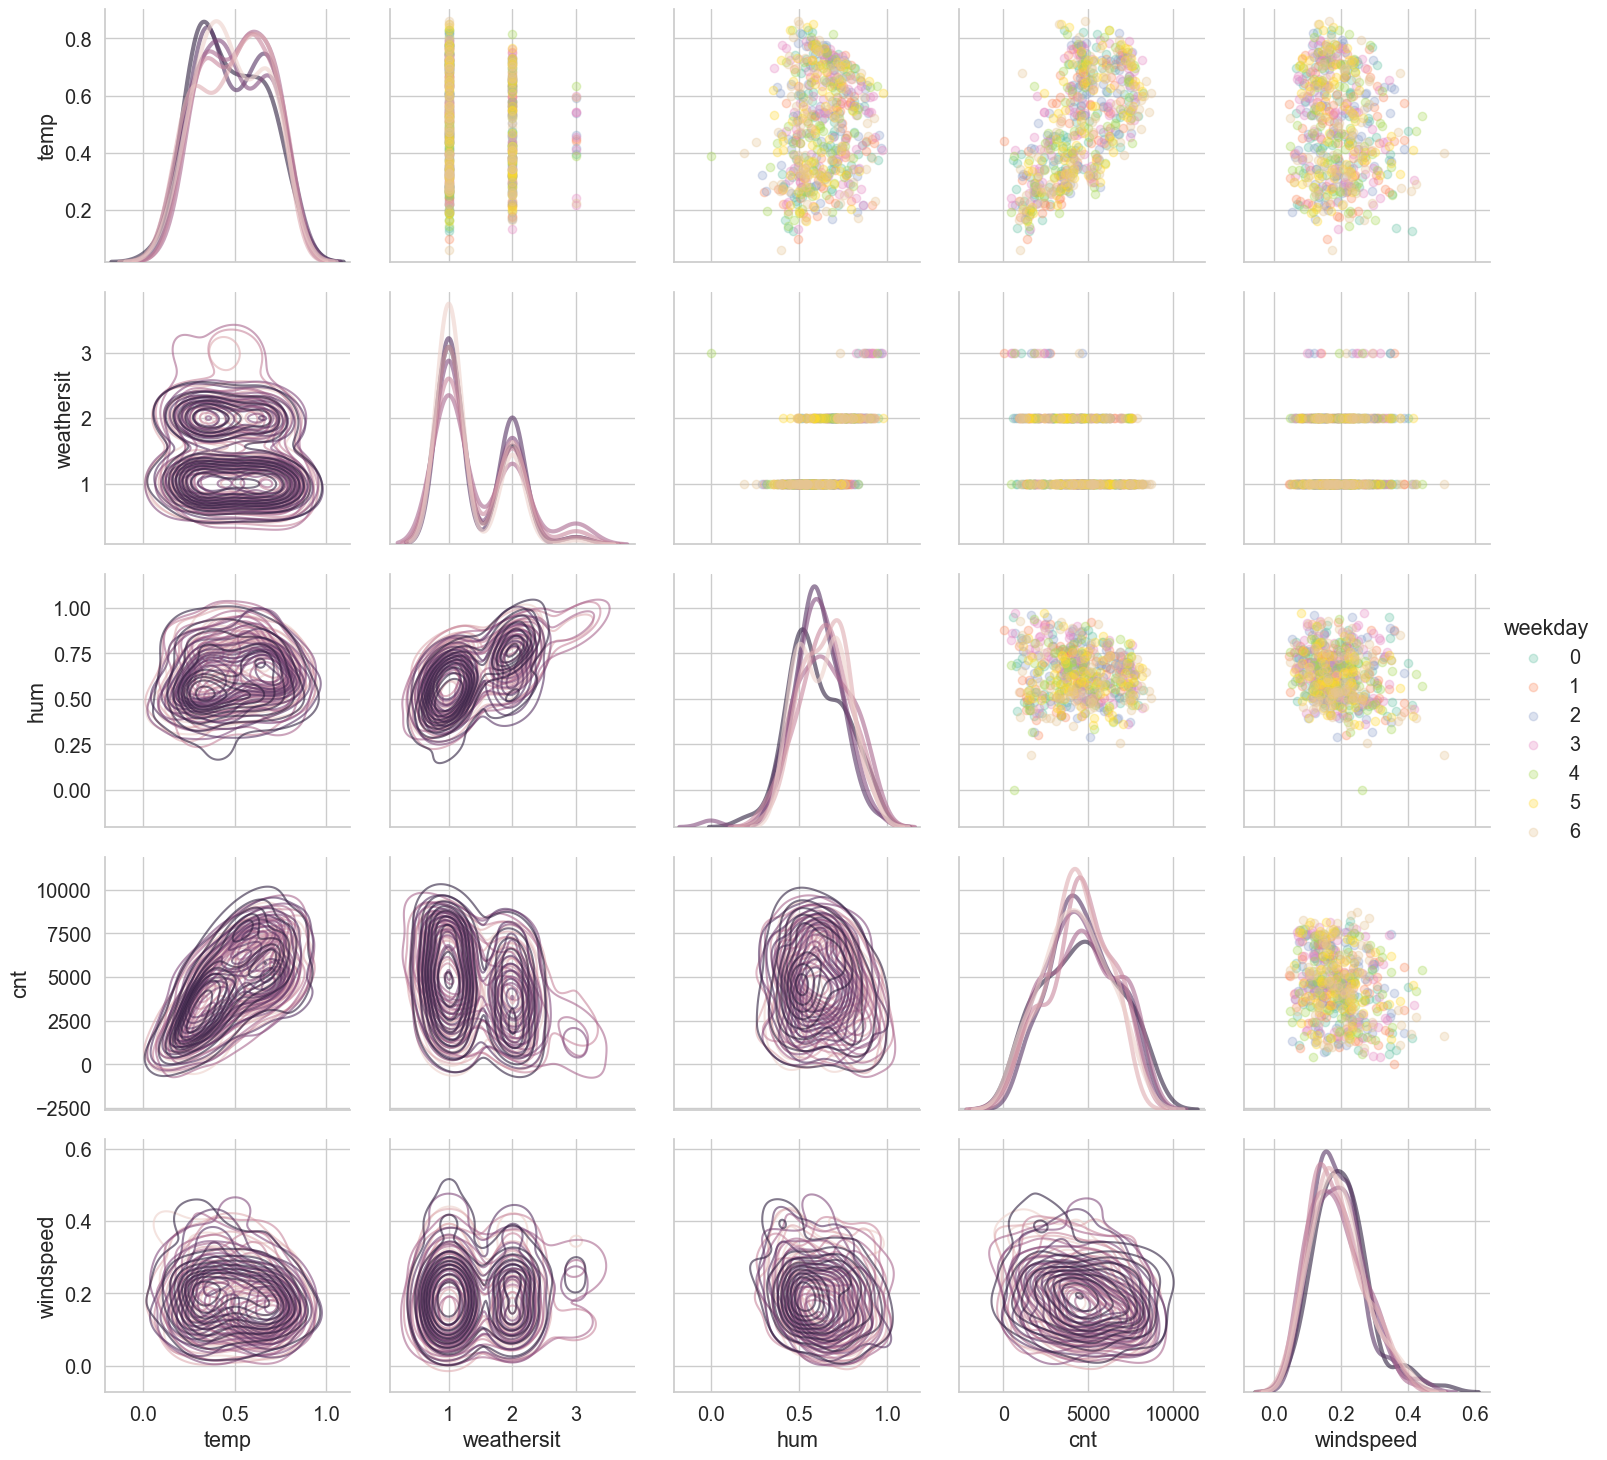

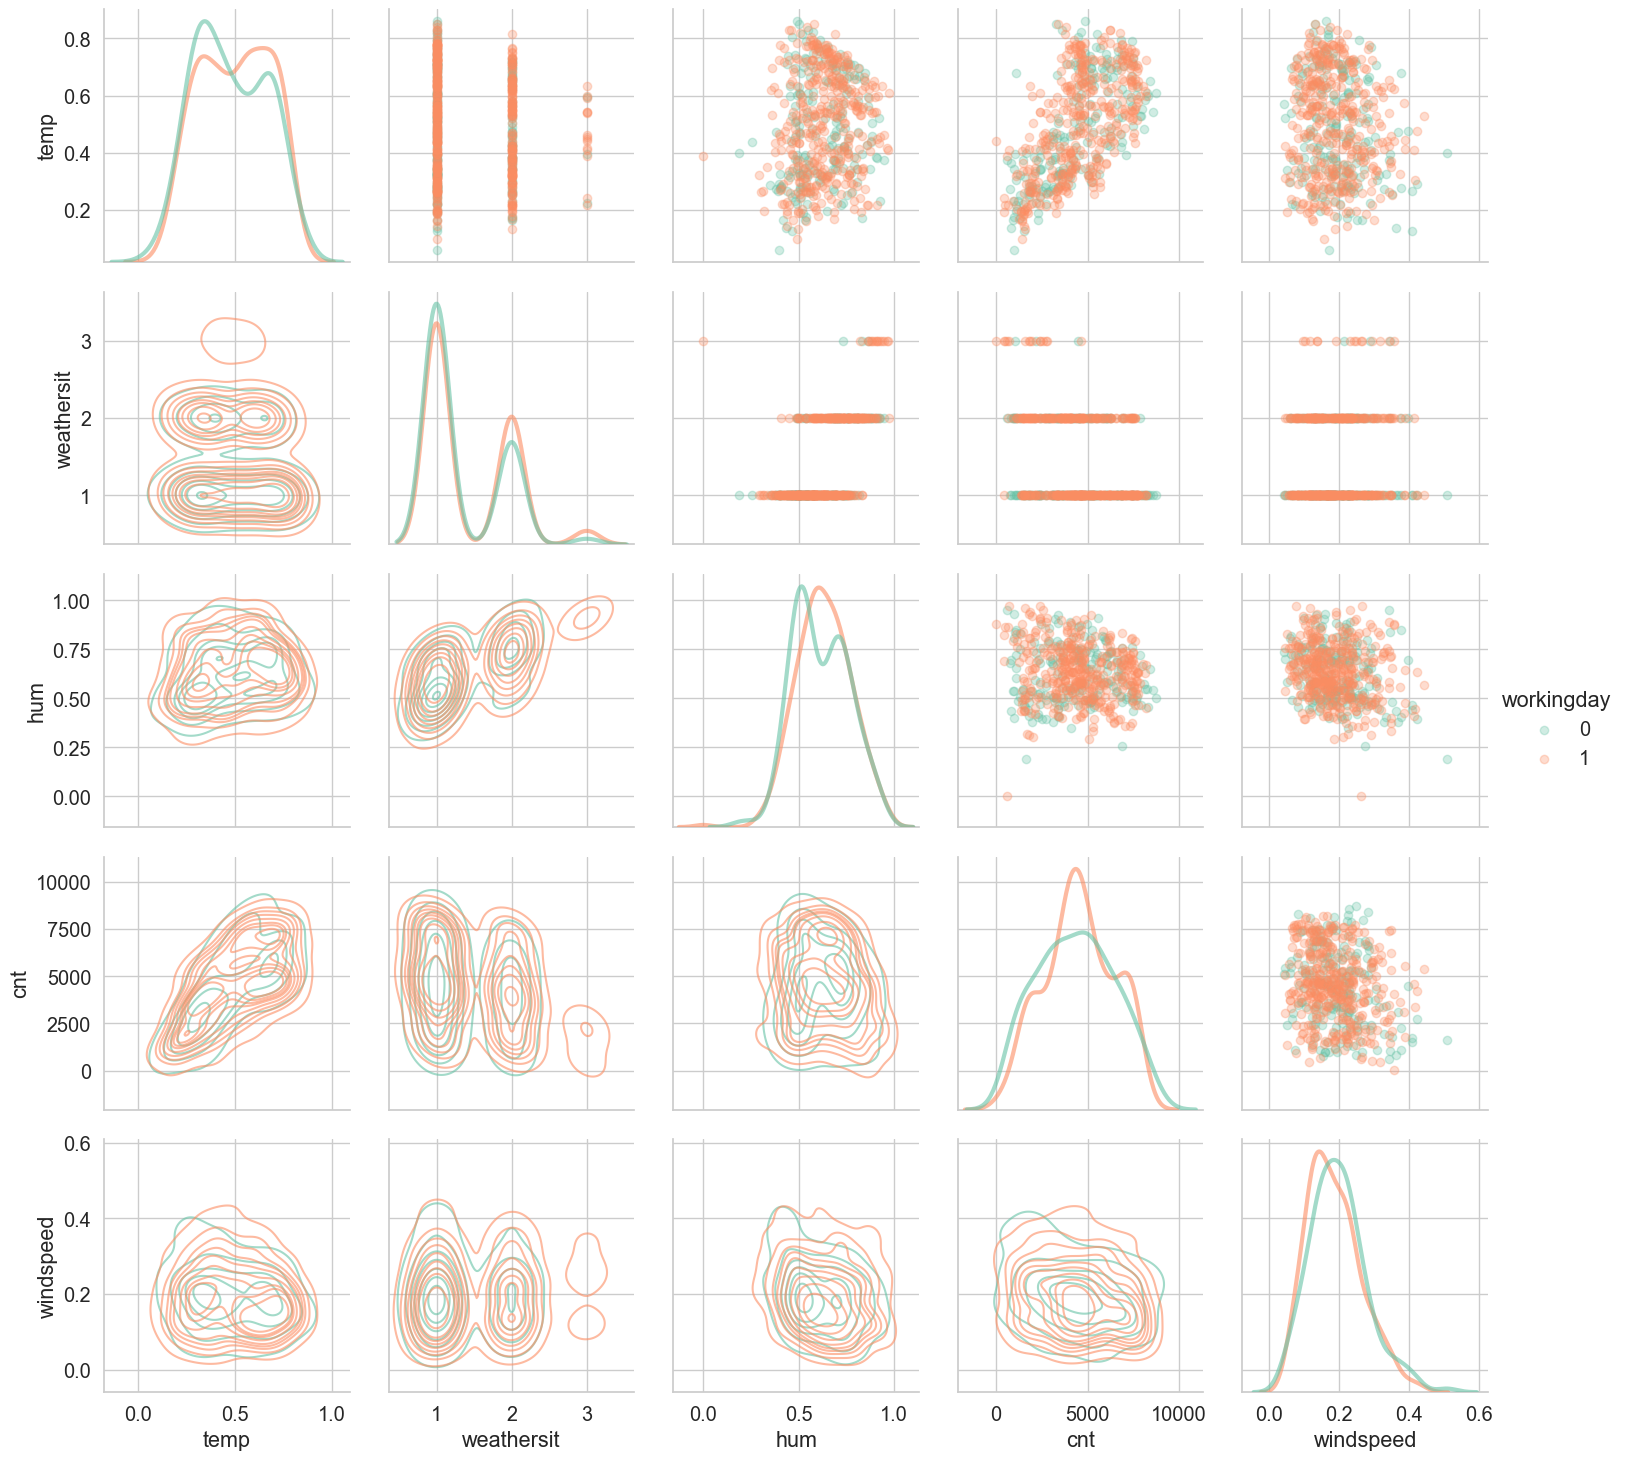

In [8]:
for hue in categorial_features:
    g = sns.PairGrid(train_data_day[['temp', 'weathersit', 'hum', 'cnt', 'windspeed', hue]],
                     hue=hue, diag_sharey=False, height=3)

    g.map_lower(sns.kdeplot, alpha=0.6)
    g.map_upper(plt.scatter, alpha=0.3)
    g.map_diag(sns.kdeplot, lw=3, alpha=0.6,
               common_norm=False)  # каждая плотность по отдельности должна давать 1 при интегрировании

    g.add_legend()

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.
> Думаю, что в признаке weathersit наблюдается просто линейная функция y=ax, где a>1, но роста больше чем этот нет. Соответсвенно возможно имеет смысл рассматривать функции которые возрастают "медленнее" линейной функции или индикаторы. В случае параметра hum можно использовать индикатор $I\{x > 0.2\}$, например





**Выводы по графикам:** Weathersit сильно влияет на cnt(чем ниже тем лучше). Также можно заметить, что в летний сезон аренда также сильно выше. Это основные категориальные признаки в рамках данных по дням. В дни, когда влажность слишком низкая видно, что активность сильно ниже

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Заметим, что параметр weathersit, хоть и является категориальными признаком, но на нем можно ввести метрику и ясно, что 1 лучше чем 4, значит в данном признаке one-hot-encoding не нужен.

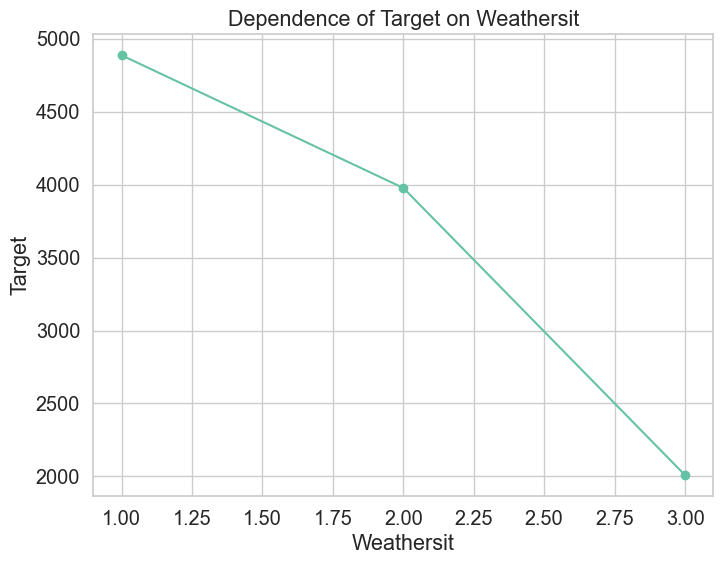

In [23]:

grouped_data = train_data_day.groupby('weathersit')['cnt'].mean()

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-')
plt.xlabel('Weathersit')
plt.ylabel('Target')
plt.title('Dependence of Target on Weathersit')
plt.grid(True)
plt.show()

> График кусочно-линейный -> это может быть признаком наличия нелинейной зависимости между этими переменными, следовательно вывод неверный

Реализуйте данную процедуру.

In [12]:
train_data_day = train_data_day.drop(train_data_day[(train_data_day['mnth'] == 12) & (train_data_day['cnt'] > 6000)].index)
train_data_day = train_data_day.drop(train_data_day[(train_data_day['hum'] == 0.0)].index)

In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
train_cat_day = encoder.fit_transform(train_data_day[categorial_features])  # обучаем и кодируем
train_cat_day

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [15]:
X_train = np.hstack([train_data_day[real_features], train_cat_day])
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train_data_day[target_feature])

LinearRegression()

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [16]:
test_cat_day = encoder.transform(test_data_day[categorial_features])
X_test = np.hstack([test_data_day[real_features], test_cat_day])
test_preds = model.predict(X_test)

print(metrics.root_mean_squared_error(test_data_day[target_feature], test_preds))

print(metrics.mean_absolute_error(test_data_day[target_feature], test_preds))

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

print(mean_absolute_percentage_error(test_data_day[target_feature], test_preds))

1310.3174383009814
1113.952380952381
32.183768519553794


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

>OneHotEncoding добавляет признаки и может произойти так что у нас какие столбцы(признаки) линейно зависимы, тогда матрица будет вырождена и определитель может быть равен 0, но в данном случае все ок

In [22]:
#посчитаем коэффициенты и rmse коэффициентов
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

X_test_extended = np.hstack([np.ones((len(X_test), 1)), X_test])
X_train_extended = np.hstack([np.ones((len(X_train), 1)), X_train])

theta_hat = np.linalg.pinv(X_test_extended) @ test_data_day[target_feature].values

y_pred = X_test_extended @ theta_hat
print(metrics.root_mean_squared_error(test_data_day[target_feature], y_pred))

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_extended, train_data_day[target_feature])

#ridge
theta_hat_ridge = np.append(ridge_reg.intercept_, ridge_reg.coef_[1:])
print(theta_hat_ridge)

#coeffs
theta_hat_formula = np.linalg.pinv(X_test_extended) @ test_data_day[target_feature].values
print(theta_hat_formula)

1164.1550000552068
[ 4603.88058607  3197.75378613  2565.50491057 -2747.51666161
 -2883.05410319  -496.08617849  -764.30490718   342.88423089
  -166.26813203   587.68880832  -233.63170396   -24.01981456
   123.56137424  -132.15903065    79.80191535   -70.31832873
  -459.49330764    65.22022055   805.27521714   414.77423021
  -318.75351708  -250.25725488  -262.51119768  -178.71778625
  -178.67544688   -34.20183396     9.67491559     5.86118406
    77.59376888   298.46519857   142.76378537]
[ 1.99478293e+03 -1.13842522e+03  8.65406468e+03 -2.93520769e+03
 -2.97538305e+03 -3.08309268e+02  1.45720828e+02  2.89253050e+01
  3.67182028e+02  1.45295477e+03  2.65529828e+02 -1.12703303e+03
  5.74824496e+02  2.86654964e+02  1.08301552e+03  8.20353347e+01
 -3.60099726e+02  2.81070114e+02  5.45529887e+02 -1.11039818e+02
  4.93760782e+02 -1.94654207e+01 -7.93822048e+02  8.12362994e+02
  1.80407430e+02  8.57093492e+01 -8.94488244e+01  1.95694220e+02
 -8.40639392e+00  8.18464154e+02  1.15777783e+03]


Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Сделайте выводы.

**Выводы:** Формула выведенная на занятии и встроенная метрика выдает схожий, но не одинаковый результат. Это говорит о том что все-таки в исходном способе свободный коэф повлиял

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. 

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

 ---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

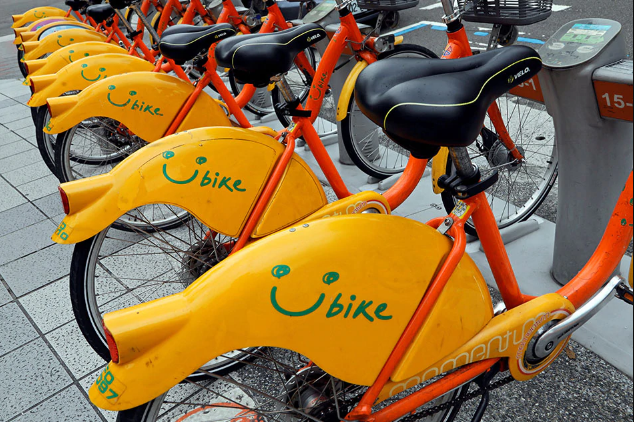

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [24]:
import numpy as np

class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.lambd = lambd
        self.fit_intercept = fit_intercept
        self.coef_ = None  # Оценки коэффициентов модели
        self.mean_ = None  # Средние значения признаков
        self.std_ = None   # Стандартные отклонения признаков

    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''

        n, dim = X.shape

        # Стандартизация признаков
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        X = (X - self.mean_) / self.std_

        if self.fit_intercept:
            X = np.hstack([np.ones((n, 1)), X])

        A = X.T @ X + self.lambd * np.identity(dim + 1)
        self.coef_ = np.linalg.inv(A) @ X.T @ Y

        return self

    def predict(self, X):
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        n, dim = X.shape

        # Стандартизация признаков
        X = (X - self.mean_) / self.std_

        if self.fit_intercept:
            X = np.hstack([np.ones((n, 1)), X])

        predictions = X @ self.coef_

        return predictions


Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [26]:
train_val_data_day, test_data_day = train_test_split(data_day, test_size=0.2)
train_data_day, validation_data_day = train_test_split(train_val_data_day, test_size=0.25)
train_data_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
584      585  2012-08-07       3   1     8        0        2           1   
81        82  2011-03-23       2   0     3        0        3           1   
274      275  2011-10-02       4   0    10        0        0           0   
254      255  2011-09-12       3   0     9        0        1           1   
18        19  2011-01-19       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
219      220  2011-08-08       3   0     8        0        1           1   
710      711  2012-12-11       4   1    12        0        2           1   
583      584  2012-08-06       3   1     8        0        1           1   
395      396  2012-01-31       1   1     1        0        2           1   
356      357  2011-12-23       1   0    12        0        5           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
584           2  0.735833  0.697621  0.703750   0.116908    1278        5995   
81            2  0.346957  0.337939  0.839565   0.234261     203        1918   
274           2  0.356667  0.345317  0.791667   0.222013     616        2302   
254           1  0.644348  0.602130  0.692174   0.088913     690        4023   
18            2  0.292174  0.298422  0.741739   0.208317      78        1572   
..          ...       ...       ...       ...        ...     ...         ...   
219           1  0.765000  0.703283  0.592083   0.192175     846        3480   
710           2  0.353333  0.338363  0.596667   0.296037     282        5219   
583           2  0.752500  0.710246  0.654167   0.129354    1233        5780   
395           1  0.390000  0.381317  0.416667   0.261817     324        4185   
356           1  0.373333  0.377513  0.686250   0.274246     163        2046   

      cnt  
584  7273  
81   2121  
274  2918  
254  4713  
18   1650  
..    ...  
219  4326  
710  5501  
583  7013  
395  4509  
356  2209  

[438 rows x 16 columns]

In [27]:
test_data_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
259      260  2011-09-17       3   0     9        0        6           0   
260      261  2011-09-18       3   0     9        0        0           0   
190      191  2011-07-10       3   0     7        0        0           0   
256      257  2011-09-14       3   0     9        0        3           1   
382      383  2012-01-18       1   1     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
169      170  2011-06-19       2   0     6        0        0           0   
499      500  2012-05-14       2   1     5        0        1           1   
208      209  2011-07-28       3   0     7        0        4           1   
500      501  2012-05-15       2   1     5        0        2           1   
438      439  2012-03-14       1   1     3        0        3           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
259           2  0.491667  0.478512  0.718333   0.189675    1434        3077   
260           1  0.507500  0.490537  0.695000   0.178483    1353        2921   
190           1  0.747500  0.690025  0.578333   0.183471    1743        3138   
256           1  0.673333  0.626900  0.697083   0.167300     647        4138   
382           1  0.303333  0.275254  0.443333   0.415429     109        3267   
..          ...       ...       ...       ...        ...     ...         ...   
169           2  0.699167  0.645846  0.666667   0.102000    1639        3105   
499           2  0.573333  0.549900  0.789583   0.212692     342        2501   
208           1  0.779167  0.739900  0.583333   0.178479     606        3784   
500           2  0.611667  0.576404  0.794583   0.147392     625        4490   
438           1  0.572500  0.548617  0.507083   0.115062     997        5315   

      cnt  
259  4511  
260  4274  
190  4881  
256  4785  
382  3376  
..    ...  
169  4744  
499  2843  
208  4390  
500  5115  
438  6312  

[147 rows x 16 columns]

In [48]:
validation_data_day

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
240      241  2011-08-29       3   0     8        0        1           1   
57        58  2011-02-27       1   0     2        0        0           0   
119      120  2011-04-30       2   0     4        0        6           0   
518      519  2012-06-02       2   1     6        0        6           0   
221      222  2011-08-10       3   0     8        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
412      413  2012-02-17       1   1     2        0        5           1   
496      497  2012-05-11       2   1     5        0        5           1   
636      637  2012-09-28       4   1     9        0        5           1   
513      514  2012-05-28       2   1     5        1        1           0   
366      367  2012-01-02       1   1     1        1        1           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
240           1  0.636667  0.607958  0.554583   0.159825     729        3905   
57            1  0.343478  0.351109  0.680000   0.125248     694        1708   
119           1  0.472500  0.464021  0.503333   0.235075    1965        3347   
518           1  0.583333  0.566288  0.549167   0.186562    2795        5325   
221           1  0.766667  0.684983  0.424167   0.200258     884        3896   
..          ...       ...       ...       ...        ...     ...         ...   
412           1  0.343333  0.351629  0.634583   0.205846     349        3805   
496           1  0.533333  0.520833  0.360417   0.236937    1319        5711   
636           2  0.619167  0.585863  0.690000   0.164179    1045        6370   
513           1  0.712500  0.679300  0.676250   0.196521    2557        3486   
366           1  0.273043  0.252304  0.381304   0.329665     244        1707   

      cnt  
240  4634  
57   2402  
119  5312  
518  8120  
221  4780  
..    ...  
412  4154  
496  7030  
636  7415  
513  6043  
366  1951  

[146 rows x 16 columns]

Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [28]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

train_data_day = train_data_day.drop(
    train_data_day[(train_data_day['mnth'] == 12) & (train_data_day['cnt'] > 6000)].index)
train_data_day = train_data_day.drop(train_data_day[(train_data_day['hum'] == 0.0)].index)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
train_cat_day = encoder.fit_transform(train_data_day[categorial_features])  # обучаем и кодируем
validation_cat_day = encoder.transform(validation_data_day[categorial_features])  # только кодируем

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [38]:
lambdas = np.logspace(-2, 2, num=5)

models = []

X_train = np.hstack([train_data_day[real_features], train_cat_day])

for lambd in lambdas:
    model = RidgeRegression(lambd=lambd)
    model.fit(X_train, train_data_day[target_feature])
    models.append(model)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики. 

In [39]:
train_rmse = []
train_mae = []
train_mape = []
validation_rmse = []
validation_mae = []
validation_mape = []

X_validation = np.hstack([validation_data_day[real_features], validation_cat_day])

for model in models:
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_validation)

    train_rmse.append(metrics.root_mean_squared_error(train_data_day[target_feature], y_train_pred))
    train_mae.append(metrics.mean_absolute_error(train_data_day[target_feature], y_train_pred))
    train_mape.append(metrics.mean_absolute_percentage_error(train_data_day[target_feature], y_train_pred))

    validation_rmse.append(metrics.root_mean_squared_error(validation_data_day[target_feature], y_val_pred))
    validation_mae.append(metrics.mean_absolute_error(validation_data_day[target_feature], y_val_pred))
    validation_mape.append(metrics.mean_absolute_percentage_error(validation_data_day[target_feature], y_val_pred))

for i, lambd in enumerate(lambdas):
    print("Lambda:", lambd)
    print("Train RMSE:", train_rmse[i])
    print("Train MAE:", train_mae[i])
    print("Train MAPE:", train_mape[i])
    print("Validation RMSE:", validation_rmse[i])
    print("Validation MAE:", validation_mae[i])
    print("Validation MAPE:", validation_mape[i])

Lambda: 0.01
Train RMSE: 1175.123113279117
Train MAE: 1003.1813747745676
Train MAPE: 0.48184002403541154
Validation RMSE: 1335.3423637726967
Validation MAE: 1120.3482925278033
Validation MAPE: 0.31886836676663033
Lambda: 0.1
Train RMSE: 1175.1299203717208
Train MAE: 1003.2428803726373
Train MAPE: 0.48094586086163865
Validation RMSE: 1335.2139532299768
Validation MAE: 1120.1675794802331
Validation MAPE: 0.31864772983686684
Lambda: 1.0
Train RMSE: 1175.3764181803751
Train MAE: 1003.6383431833209
Train MAPE: 0.4760364222886189
Validation RMSE: 1334.3445534528264
Validation MAE: 1119.0826273668001
Validation MAPE: 0.3172555287547426
Lambda: 10.0
Train RMSE: 1181.4380245466612
Train MAE: 1006.769747057878
Train MAPE: 0.4636028012120974
Validation RMSE: 1330.6332437470307
Validation MAE: 1111.476537612622
Validation MAPE: 0.3079040492012356
Lambda: 100.0
Train RMSE: 1463.7209873167901
Train MAE: 1148.7296343106675
Train MAPE: 0.4167659969490126
Validation RMSE: 1525.6185107499946
Validation 

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

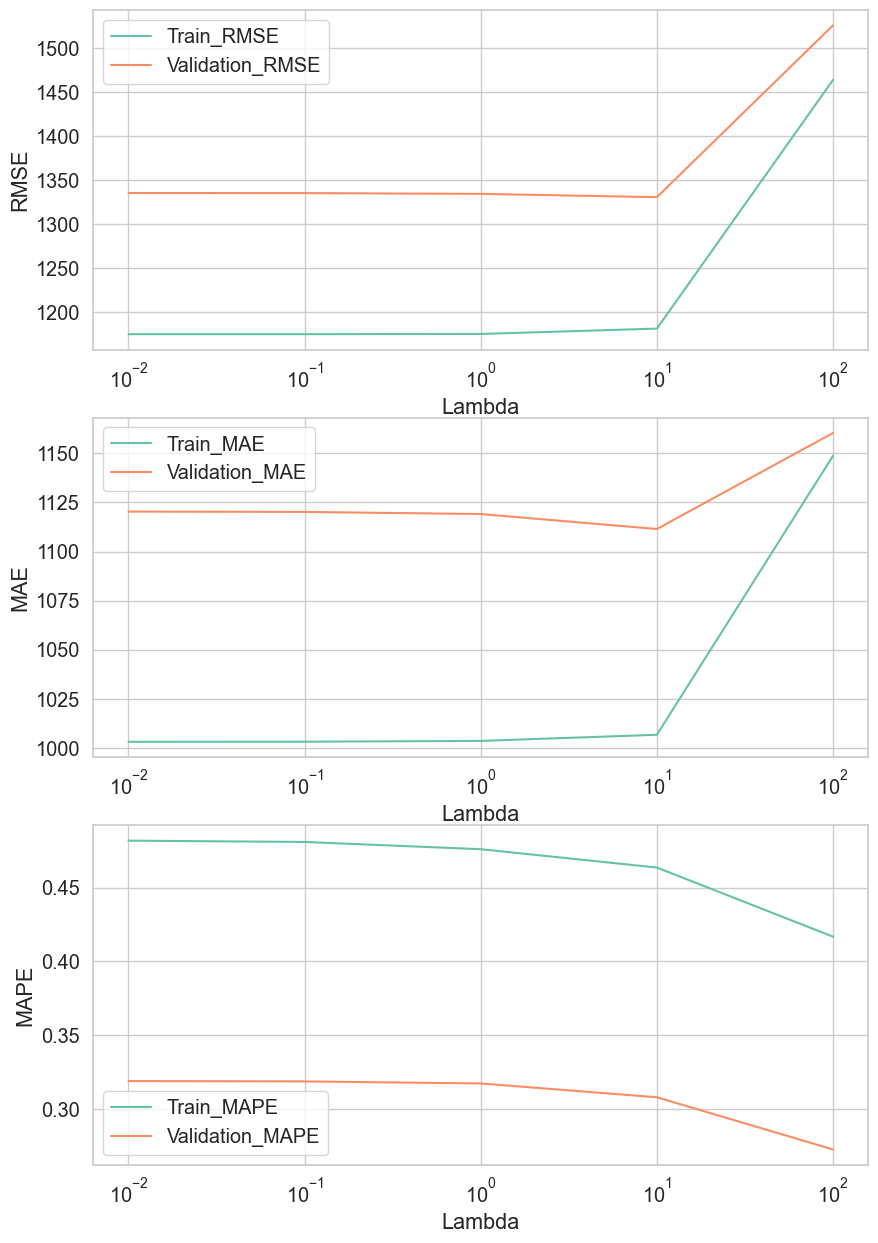

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

ax = axes[0]
ax.plot(lambdas, train_rmse, label='Train_RMSE')
ax.plot(lambdas, validation_rmse, label='Validation_RMSE')
ax.set_xscale('log')
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE')
ax.legend()

ax = axes[1]
ax.plot(lambdas, train_mae, label='Train_MAE')
ax.plot(lambdas, validation_mae, label='Validation_MAE')
ax.set_xscale('log')
ax.set_xlabel('Lambda')
ax.set_ylabel('MAE')
ax.legend()

ax = axes[2]
ax.plot(lambdas, train_mape, label='Train_MAPE')
ax.plot(lambdas, validation_mape, label='Validation_MAPE')
ax.set_xscale('log')
ax.set_xlabel('Lambda')
ax.set_ylabel('MAPE')
ax.legend()


# Добавляем общий заголовок
plt.show()

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

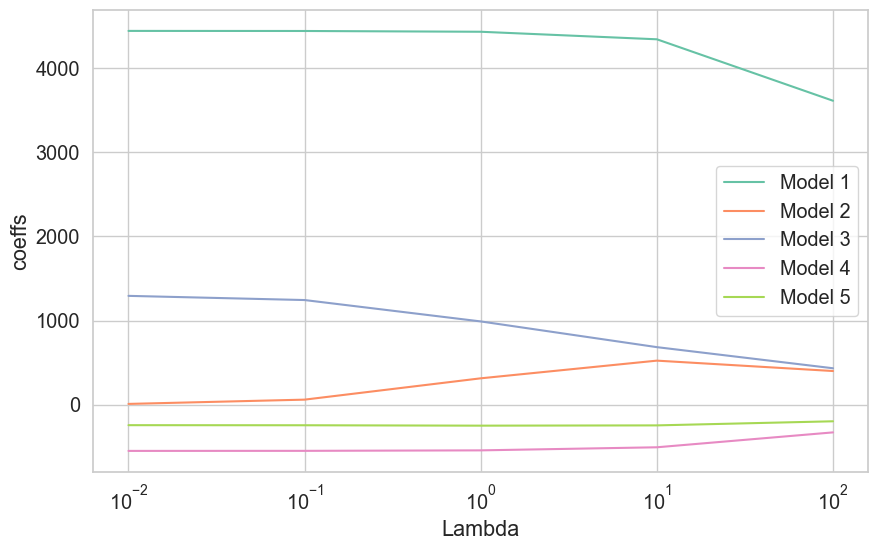

In [64]:
coef_values = []
for model in models:
    coef_values.append(model.coef_)

coef_values = np.array(coef_values)
fig, ax = plt.subplots(figsize=(10, 6))

for i, coef_value in enumerate(coef_values):
    ax.plot(lambdas, coef_values[:,i], label=f'Model {i+1}')

ax.set_xscale('log')
ax.set_xlabel('Lambda')
ax.set_ylabel('coeffs')
ax.legend()
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

In [92]:
X_test = np.hstack([test_data_day[real_features], test_cat_day])

y_test_pred = models[0].predict(X_test)

print(metrics.root_mean_squared_error(test_data_day[target_feature], y_test_pred))
print(metrics.mean_absolute_error(test_data_day[target_feature], y_test_pred))
print(metrics.mean_absolute_percentage_error(test_data_day[target_feature], y_test_pred))

1560.1931230788846
1274.710479271029
0.4019179114625586


Сделайте выводы.
Чем меньше lambda тем лучше

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

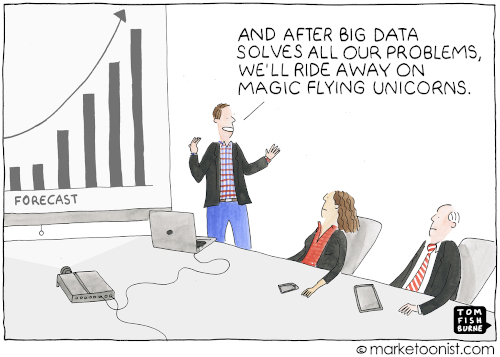

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [ ]:
eta = random.uniform(0,1)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.